# 1. 활성화 함수

In [1]:
import numpy as np

# warning 무시
import warnings
warnings.filterwarnings('ignore')

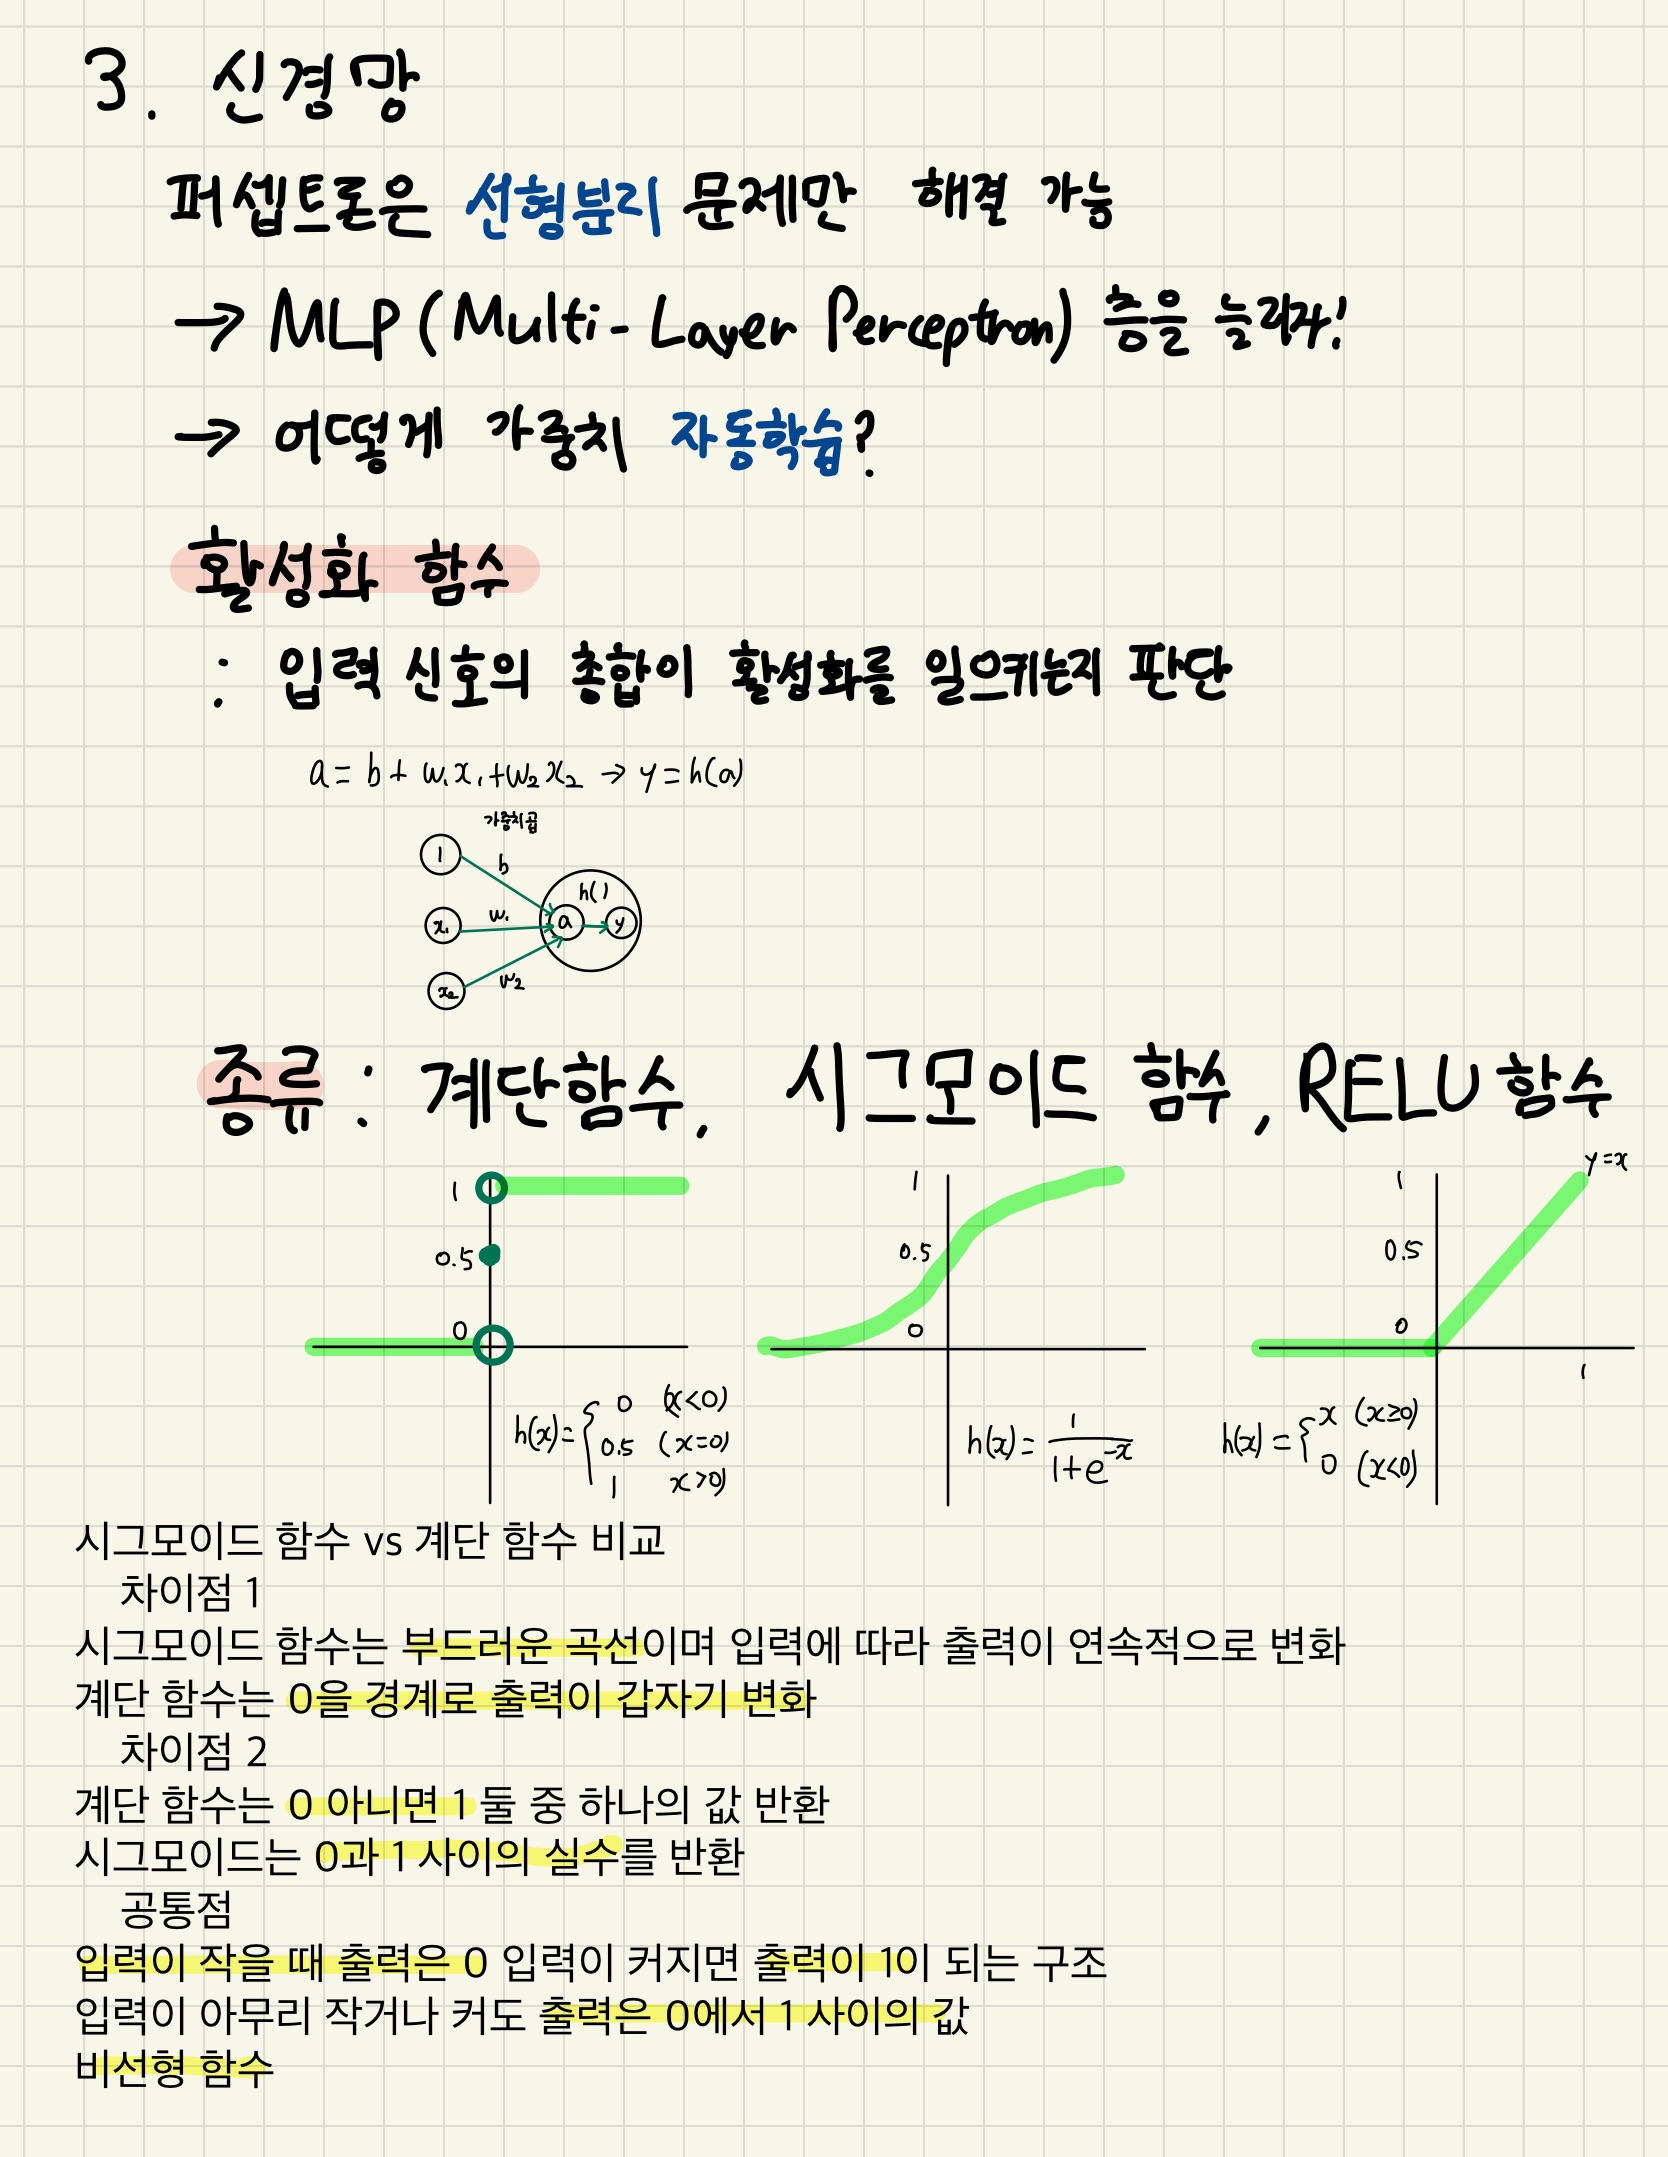

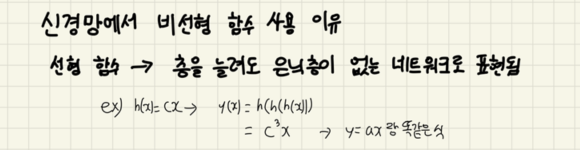

### 1. 계단함수

In [2]:
# numpy 배열 입력이 가능한 계단 함수

def step_function(x):
    y = x > 0 
    # numpy array인 x가 0보다 큰지 True, False 로 반환
    return y.astype(np.int)
    # True False를 숫자 0 1 로 반환

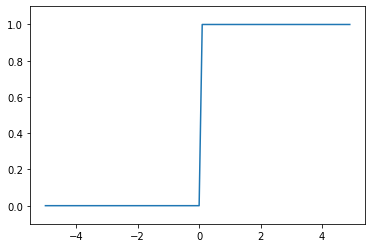

In [3]:
# 시각화
import matplotlib.pyplot as plt
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

### 2. 시그모이드 함수

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

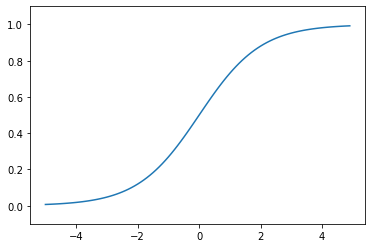

In [5]:
# 시각화
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3. RELU 함수

In [6]:
def relu(x):
    return np.maximum(0, x)
# maximum 함수는 두 입력 중 큰 값을 반환
# 0과 x 중 큰 값을 반환

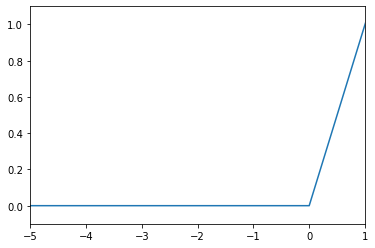

In [7]:
# 시각화
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)

# 그래프 범위 제한
plt.xlim(-5,1)
plt.ylim(-0.1, 1.1)
plt.show()

# 2. 출력층 설계 - 항등 함수(회귀), 소프트맥스 함수(분류)

In [8]:
# 항등함수
def identity_function(x):
    return x

In [9]:
# 소프트맥스 함수
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

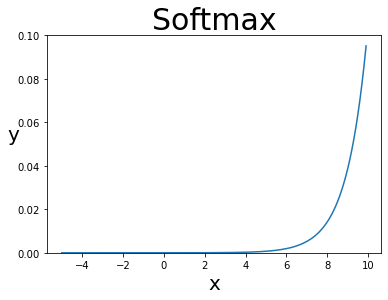

In [10]:
# 시각화
x = np.arange(-5.0, 10.0, 0.1)
y = softmax(x)

plt.plot(x, y)
plt.ylim(0, 0.1)
plt.title("Softmax", fontsize=30)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20, rotation=0)
plt.show()

###### 소프트맥스 오버플로우 문제

In [11]:
# 아무 조치없이 할 경우 매우 큰 값이 나오므로 nan 값이 나옴
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum( np.exp(a) )

array([nan, nan, nan])

In [12]:
c = np.max(a)
print(a - c)

# 아무 조치 없이 할 경우 nan, 그래서 리스트의 최댓값을 빼줌
np.exp(a - c) / np.sum( np.exp(a - c) )

[  0 -10 -20]


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [13]:
# 1D 입력을 처리할 수 있는 softmax
# 최댓값을 빼주면 출력의 최댓값이 0으로 고정되므로 0이하의 값으로 안정적이게 출력이 될 수 있음

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [14]:
# 2D 입력도 처리할 수 있는 softmax
# 설명 링크
# https://github.com/ChangdaeVictorLee/private/blob/main/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A42d%20%EC%9E%85%EB%A0%A5%20%EC%BD%94%EB%93%9C%20%EC%84%A4%EB%AA%85.ipynb
def softmax(a):
    if a.ndim >= 2:
        c = np.max( a, axis=1, keepdims=True )
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum( exp_a, axis=1, keepdims=True )
    else:
        c = np.max(a)
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum(exp_a)

    return exp_a / sum_exp_a

In [15]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


# 3. 신경망에서의 행렬 곱

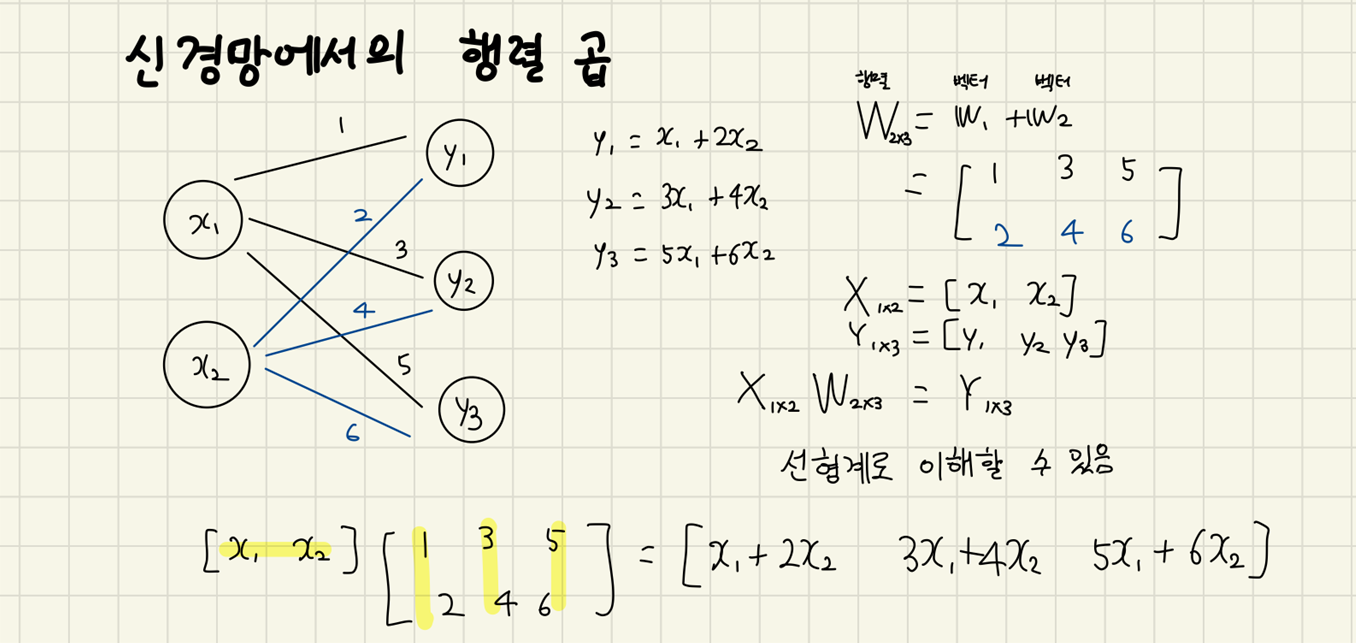

In [16]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W.shape)
Y = np.dot( X, W )
print(Y)

(2,)
(2, 3)
[ 5 11 17]


# 4. 3층 신경망 구현

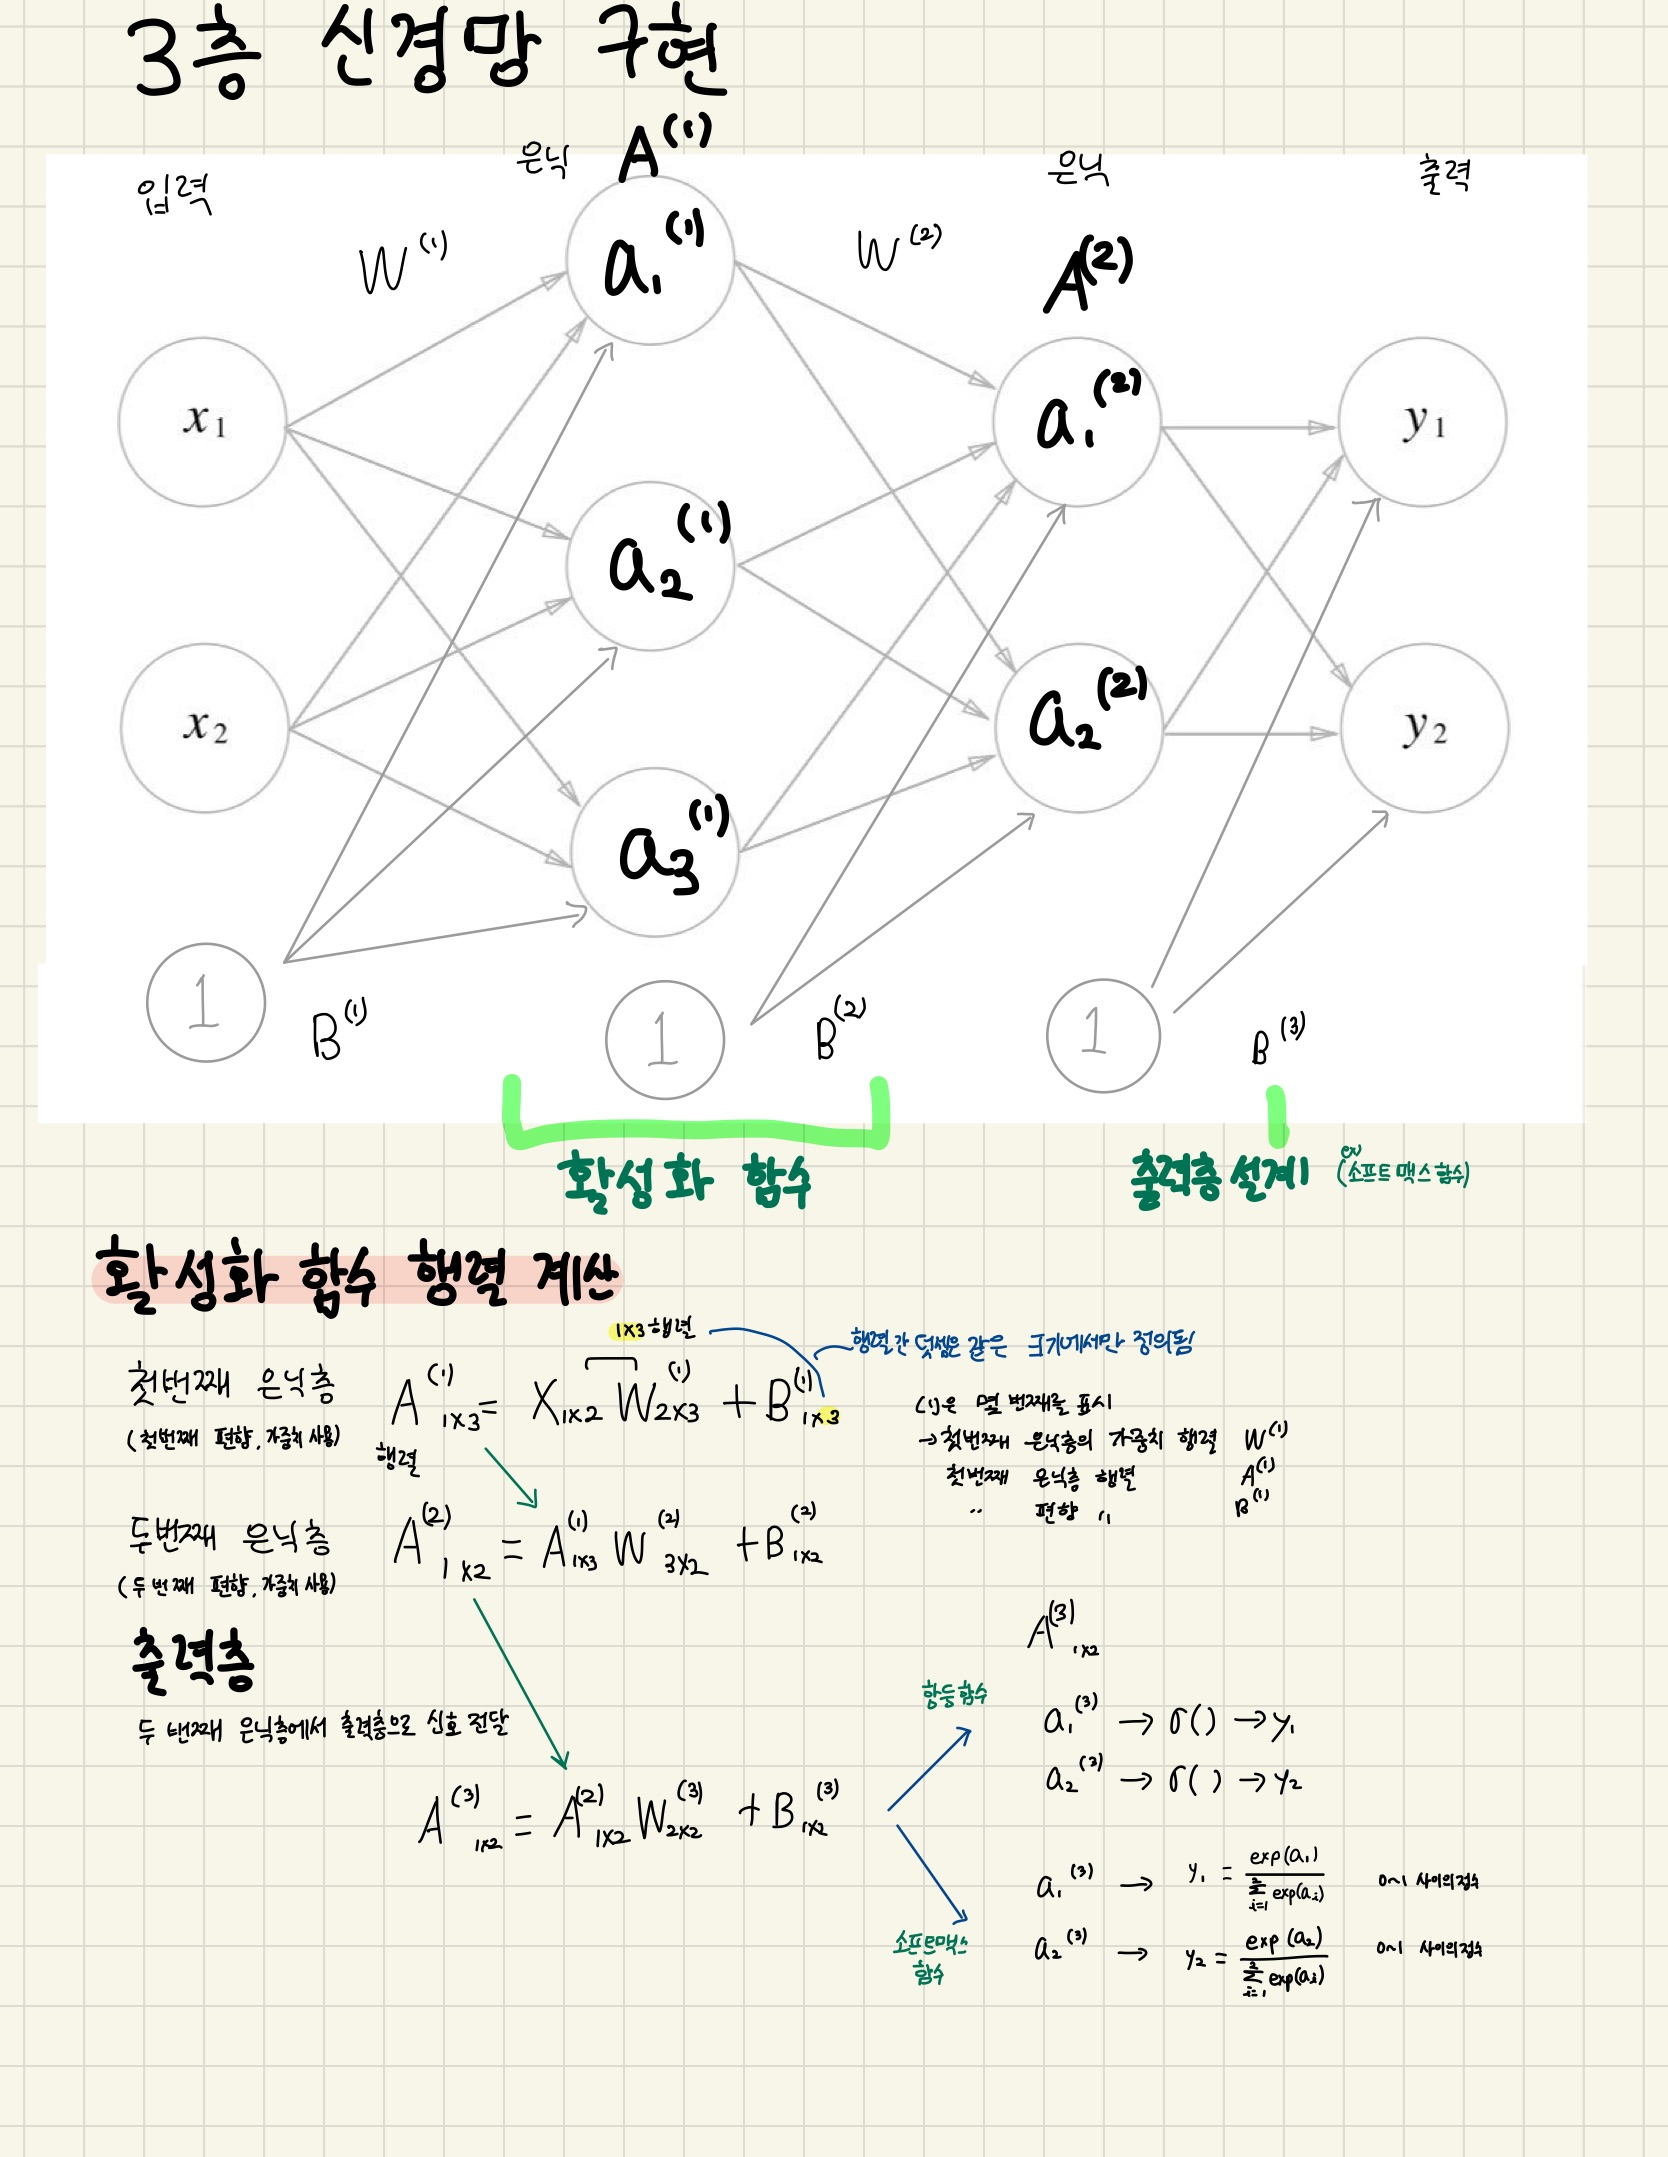

#### 은닉층 통과
1. X에 가중치를 곱하고 편향을 더함(행렬 계산)
2. 그 값을 활성화 함수로 통과시켜 첫번째 은닉층 만듦
3. 1,2를 다시 진행해 두번째 은닉층 만듦

#### 출력층 통과

In [17]:
# 1번
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1
print(A1)

[0.3 0.7 1.1]


In [18]:
# 2번

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [19]:
# 3번

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


### 각각 항등함수와 소프트맥스 함수로 출력층 설계

###### 항등함수

In [20]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.4], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

# 네트워크의 값을 바탕으로 신경망 순전파 진행
# 활성화 함수; sigmoid, 출력층: identity (항등함수)
def forward( network, x ):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward( network, x )
print(y)

[0.31442506 0.69147506]


###### 소프트맥스

In [21]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.4], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

# 네트워크의 값을 바탕으로 신경망 순전파 진행 
# 활성화 함수; sigmoid, 출력층: softmax (항등함수)
def forward( network, x ):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward( network, x )
print(y)

[0.4068386 0.5931614]
